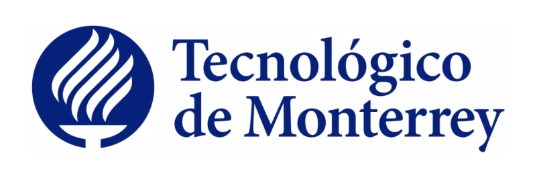

                            Campus Santa Fe                              

            Reporte: Logistic Regression Breast Cancer Dataset           

    Inteligencia artificial avanzada para la ciencia de datos I (Gpo 101)

                    Andrés Jaramillo Barón A01029079                     

                        Esteban Castillo Juarez                          

                                03/09/2025                               

### Introducción

In [50]:
import pandas as pd
import numpy as np
import plotly.express as px
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS
from keras.models import Sequential
from keras.layers import Dense

### Preprocesamiento de datos

In [3]:
training = fetch_20newsgroups(subset = 'train', remove = ('headers', 'footers', 'quotes'))
test = fetch_20newsgroups(subset = 'test', remove = ('headers', 'footers', 'quotes'))

In [6]:
texts_training_raw = training.data
texts_test_raw  = test.data
y_train = training.target
y_test  = test.target
target_names = training.target_names

In [35]:
custom_stop = list(ENGLISH_STOP_WORDS.union({'ax', 'max', 'edu'}))

vectorizer = CountVectorizer(
    lowercase=True,                 # pasa a minúsculas
    strip_accents='unicode',        # elimina acentos
    stop_words=custom_stop,           # stopwords inglés + extras
    token_pattern=r"(?u)\b[a-zA-Z]+'?[a-zA-Z]+\b",  # solo palabras (>=2 letras)
    ngram_range=(1, 2),             # uni y bi-gramas
    min_df=3,                       # ignora términos muy raros
    max_df=0.9                      # ignora términos demasiado frecuentes
)

X_train = vectorizer.fit_transform(texts_training_raw)  # aprende vocabulario en train
X_test  = vectorizer.transform(texts_test_raw)       # aplica al test

print(X_train.shape, X_test.shape, len(target_names))

(11314, 57078) (7532, 57078) 20


In [37]:
vocab = vectorizer.get_feature_names_out()
word_counts = np.asarray(X_train.sum(axis=0)).ravel()

sorted_idx = word_counts.argsort()[::-1]
top_words = [(vocab[i], word_counts[i]) for i in sorted_idx[:5]]

print("Top 5 palabras más frecuentes en el BoW (train):")
for w, c in top_words:
    print(f"{w}: {c}")

Top 5 palabras más frecuentes en el BoW (train):
people: 4014
like: 3963
don't: 3817
just: 3752
know: 3483


### Visualización de datos

In [43]:
categorias = [target_names[i] for i in y_train]

fig = px.histogram(x=categorias,
                   title="Distribución de documentos por categoría (Train)",
                   labels={"x": "Categoría", "y": "Frecuencia"},
                   color=categorias)  # colorea por categoría
fig.update_xaxes(categoryorder="total descending")
fig.show()

In [44]:
# Longitudes de cada documento
doc_lengths = [len(text.split()) for text in texts_training_raw]
categorias = [target_names[i] for i in y_train]

fig = px.box(x=categorias, y=doc_lengths,
             title="Distribución de longitudes de documentos por categoría",
             labels={"x": "Categoría", "y": "Longitud (número de palabras)"})
fig.update_xaxes(categoryorder="total descending")
fig.show()


In [45]:
word_counts = np.asarray(X_train.sum(axis=0)).ravel()
vocab = vectorizer.get_feature_names_out()

sorted_idx = word_counts.argsort()[::-1]
top_n = 20
top_words = [(vocab[i], word_counts[i]) for i in sorted_idx[:top_n]]

fig = px.bar(x=[w for w,c in top_words], y=[c for w,c in top_words],
             title=f"Top {top_n} palabras más frecuentes (Train)",
             labels={"x": "Palabra", "y": "Frecuencia"})
fig.show()

### Red Neuronal

In [ ]:
X_train_dense = X_train.toarray().astype(np.float32)
X_test_dense  = X_test.toarray().astype(np.float32)

num_classes = len(target_names)

model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(X_train_dense.shape[1],)))
model.add(Dense(256, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 512)            │    29,224,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 20)             │         5,140 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,360,916 (112.00 MB)

 Trainable params: 29,360,916 (112.00 MB)

 Non-trainable params: 0 (0.00 B)

In [57]:
history = model.fit(
    X_train_dense, y_train,
    validation_split=0.15,   # reservamos un 15% para validación
    epochs=12,
    batch_size=256,
    verbose=1
)

Epoch 1/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 272ms/step - accuracy: 0.5760 - loss: 1.9413 - val_accuracy: 0.7173 - val_loss: 1.1881
Epoch 2/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 269ms/step - accuracy: 0.9025 - loss: 0.5247 - val_accuracy: 0.7485 - val_loss: 0.9257
Epoch 3/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 265ms/step - accuracy: 0.9582 - loss: 0.2431 - val_accuracy: 0.7426 - val_loss: 0.9933
Epoch 4/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 251ms/step - accuracy: 0.9665 - loss: 0.1630 - val_accuracy: 0.7367 - val_loss: 1.0005
Epoch 5/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 259ms/step - accuracy: 0.9698 - loss: 0.1301 - val_accuracy: 0.7391 - val_loss: 1.0461
Epoch 6/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 253ms/step - accuracy: 0.9709 - loss: 0.1148 - val_accuracy: 0.7379 - val_loss: 1.0718
Epoch 7/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 254ms/step - accuracy: 0.9708 - loss: 0.1072 - val_accuracy: 0.7309 - val_loss: 1.0951
Epoch 8/12
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 248ms/step - accuracy: 0.9714 - loss: 0.1058 - val_accur

In [59]:
loss, acc = model.evaluate(X_test_dense, y_test, verbose=0)
print(f"Test accuracy: {acc * 100:.4f}%")

Test accuracy: 65.5204%
